In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from collections import Counter

In [20]:
data=pd.read_excel('/content/Processed_Data.xlsx')
data

,Price,Transmission,Power,Engine CC,Fuel_2.0,Male,Female,Unknown,Total,Sale_2
0,30.619322,5.966102,94.033898,1497.169492,0,814172,422731,56487,1293390,0
1,18.532143,5.714286,68.571429,1166.142857,0,554879,631666,54057,1240602,0
2,31.242154,6.164835,89.461538,1537.406593,0,483216,310604,47563,841383,0
3,22.100000,5.615385,75.576923,1219.653846,0,241287,312556,28004,581847,0
4,47.848370,6.444444,126.111111,1995.777778,0,408016,115843,29125,552984,0
...,...,...,...,...,...,...,...,...,...,...
6087,108.747195,7.853659,207.609756,2304.975610,1,1012,150,80,1242,1
6088,43.548516,1.354839,137.774193,2261.193548,0,670,482,66,1218,1
6089,55.200000,6.000000,163.500000,2696.500000,0,790,247,81,1118,1
6090,30.081000,4.000000,110.000000,2254.000000,0,639,416,49,1104,1


In [21]:
data.drop(['Sale_2','Male','Female','Unknown'], axis = 1, inplace = True)
data.dropna(inplace= True)
data 


,Price,Transmission,Power,Engine CC,Fuel_2.0,Total
0,30.619322,5.966102,94.033898,1497.169492,0,1293390
1,18.532143,5.714286,68.571429,1166.142857,0,1240602
2,31.242154,6.164835,89.461538,1537.406593,0,841383
3,22.100000,5.615385,75.576923,1219.653846,0,581847
4,47.848370,6.444444,126.111111,1995.777778,0,552984
...,...,...,...,...,...,...
6087,108.747195,7.853659,207.609756,2304.975610,1,1242
6088,43.548516,1.354839,137.774193,2261.193548,0,1218
6089,55.200000,6.000000,163.500000,2696.500000,0,1118
6090,30.081000,4.000000,110.000000,2254.000000,0,1104


In [22]:
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data['Transmission'] = pd.to_numeric(data['Transmission'], errors='coerce')
data['Power'] = pd.to_numeric(data['Power'], errors='coerce')
data['Engine CC'] = pd.to_numeric(data['Engine CC'], errors='coerce')

data

,Price,Transmission,Power,Engine CC,Fuel_2.0,Total
0,30.619322,5.966102,94.033898,1497.169492,0,1293390
1,18.532143,5.714286,68.571429,1166.142857,0,1240602
2,31.242154,6.164835,89.461538,1537.406593,0,841383
3,22.100000,5.615385,75.576923,1219.653846,0,581847
4,47.848370,6.444444,126.111111,1995.777778,0,552984
...,...,...,...,...,...,...
6087,108.747195,7.853659,207.609756,2304.975610,1,1242
6088,43.548516,1.354839,137.774193,2261.193548,0,1218
6089,55.200000,6.000000,163.500000,2696.500000,0,1118
6090,30.081000,4.000000,110.000000,2254.000000,0,1104


In [23]:
data.dropna(inplace= True)
data

,Price,Transmission,Power,Engine CC,Fuel_2.0,Total
0,30.619322,5.966102,94.033898,1497.169492,0,1293390
1,18.532143,5.714286,68.571429,1166.142857,0,1240602
2,31.242154,6.164835,89.461538,1537.406593,0,841383
3,22.100000,5.615385,75.576923,1219.653846,0,581847
4,47.848370,6.444444,126.111111,1995.777778,0,552984
...,...,...,...,...,...,...
6087,108.747195,7.853659,207.609756,2304.975610,1,1242
6088,43.548516,1.354839,137.774193,2261.193548,0,1218
6089,55.200000,6.000000,163.500000,2696.500000,0,1118
6090,30.081000,4.000000,110.000000,2254.000000,0,1104


In [30]:
h=0
l=0
df=data.head(10000-3)
for i in df.index:
  if df.loc[i,'Total']>60000:
    df.loc[i,'Class']="Trending"
    h=h+1
  else:
    df.loc[i,'Class']="Not trending"
    l=l+1
df.drop(['Total' ], axis = 1, inplace = True) 
print(h)
print(l)
df

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


1127
4965


,Price,Transmission,Power,Engine CC,Fuel_2.0,Class
0,30.619322,5.966102,94.033898,1497.169492,0,Trending
1,18.532143,5.714286,68.571429,1166.142857,0,Trending
2,31.242154,6.164835,89.461538,1537.406593,0,Trending
3,22.100000,5.615385,75.576923,1219.653846,0,Trending
4,47.848370,6.444444,126.111111,1995.777778,0,Trending
...,...,...,...,...,...,...
6087,108.747195,7.853659,207.609756,2304.975610,1,Not trending
6088,43.548516,1.354839,137.774193,2261.193548,0,Not trending
6089,55.200000,6.000000,163.500000,2696.500000,0,Not trending
6090,30.081000,4.000000,110.000000,2254.000000,0,Not trending


In [32]:
df.to_csv('final_data.csv')

In [33]:
train,test=train_test_split(df,test_size=0.2,random_state=0)
x_train=train.drop(["Class"],axis=1)
y_train=train["Class"]
x_test=test.drop(["Class"],axis=1)
y_test=test["Class"]

model1 = DecisionTreeClassifier()
model1 = model1.fit(x_train,y_train)
print("accuracy of training data: ",model1.score(x_train, y_train))
print("depth of tree: ",model1.get_depth())

accuracy of training data:  0.9195567412271701
depth of tree:  19


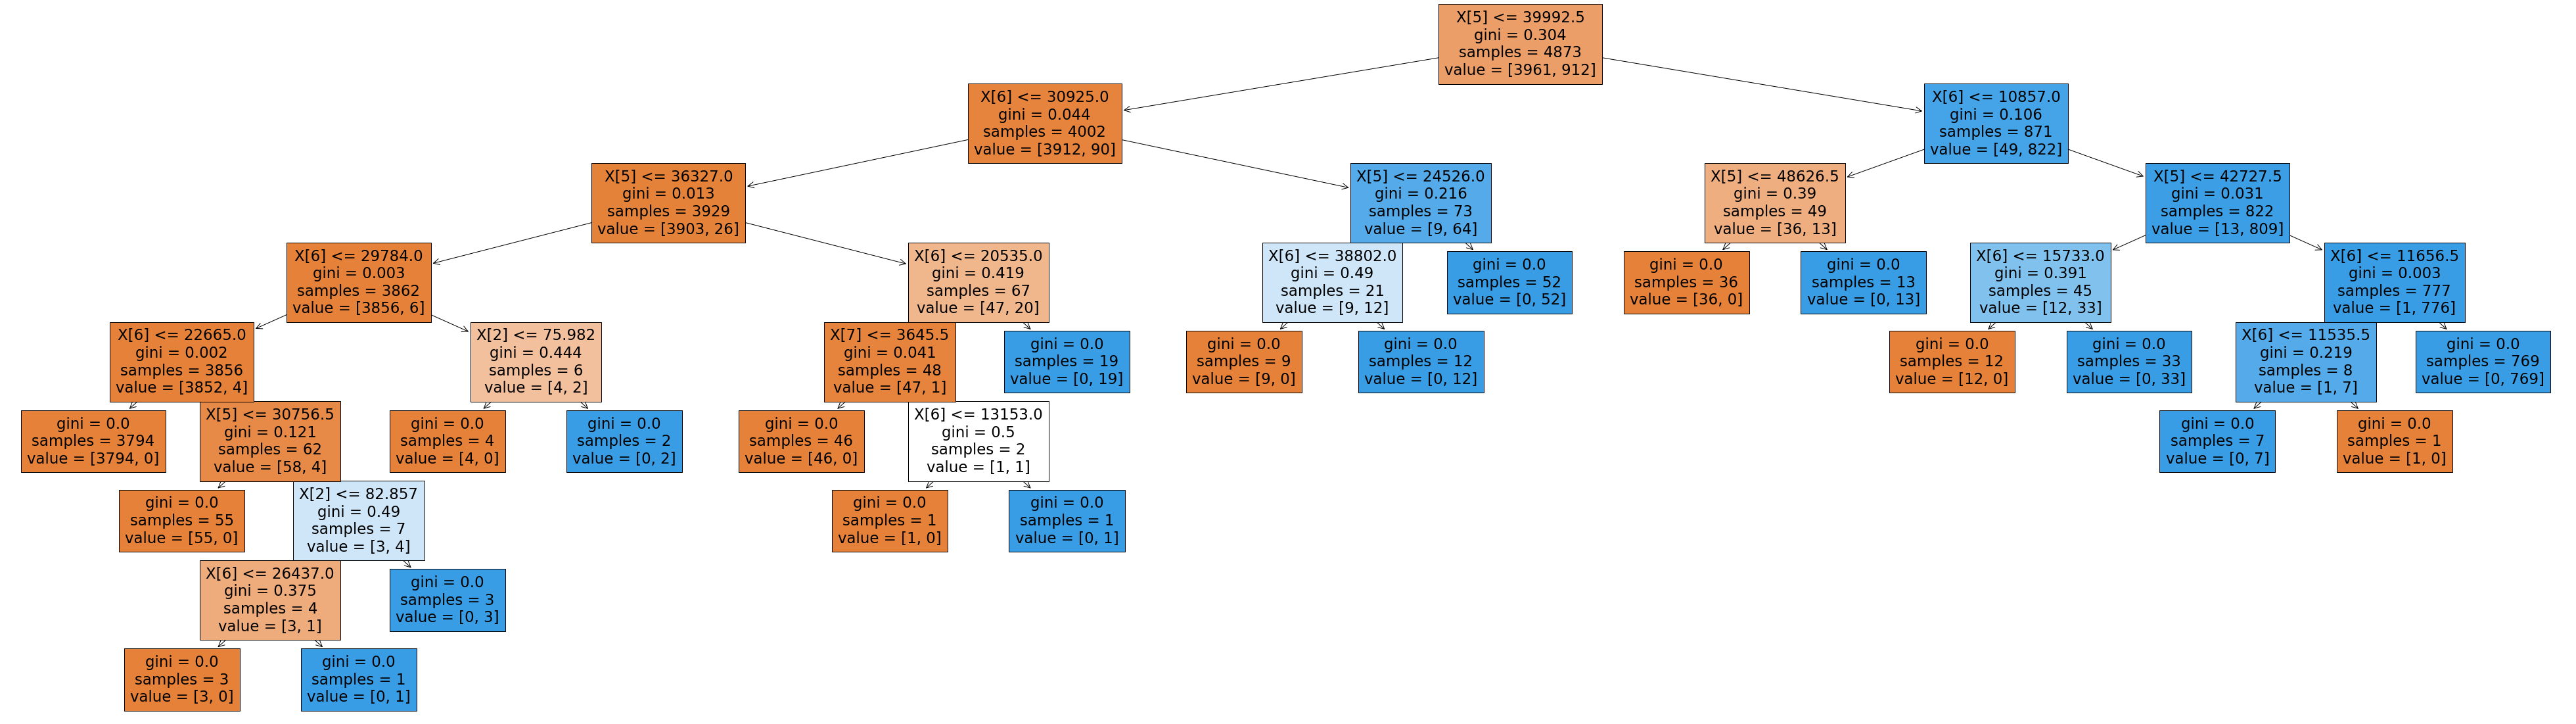

In [13]:
plt.figure(figsize=(70,20))
tree.plot_tree(model1, filled=True)
plt.show()

In [34]:
model2 = DecisionTreeClassifier(max_depth=5)
model2 = model2.fit(x_train,y_train)
print("Training data accuracy: ", model2.score(x_train, y_train))
print("Test data accuracy: ", model2.score(x_test,y_test))
print("depth imposed is: ",model2.get_depth())

Training data accuracy:  0.8210547917094192
Test data accuracy:  0.8252666119770303
depth imposed is:  5


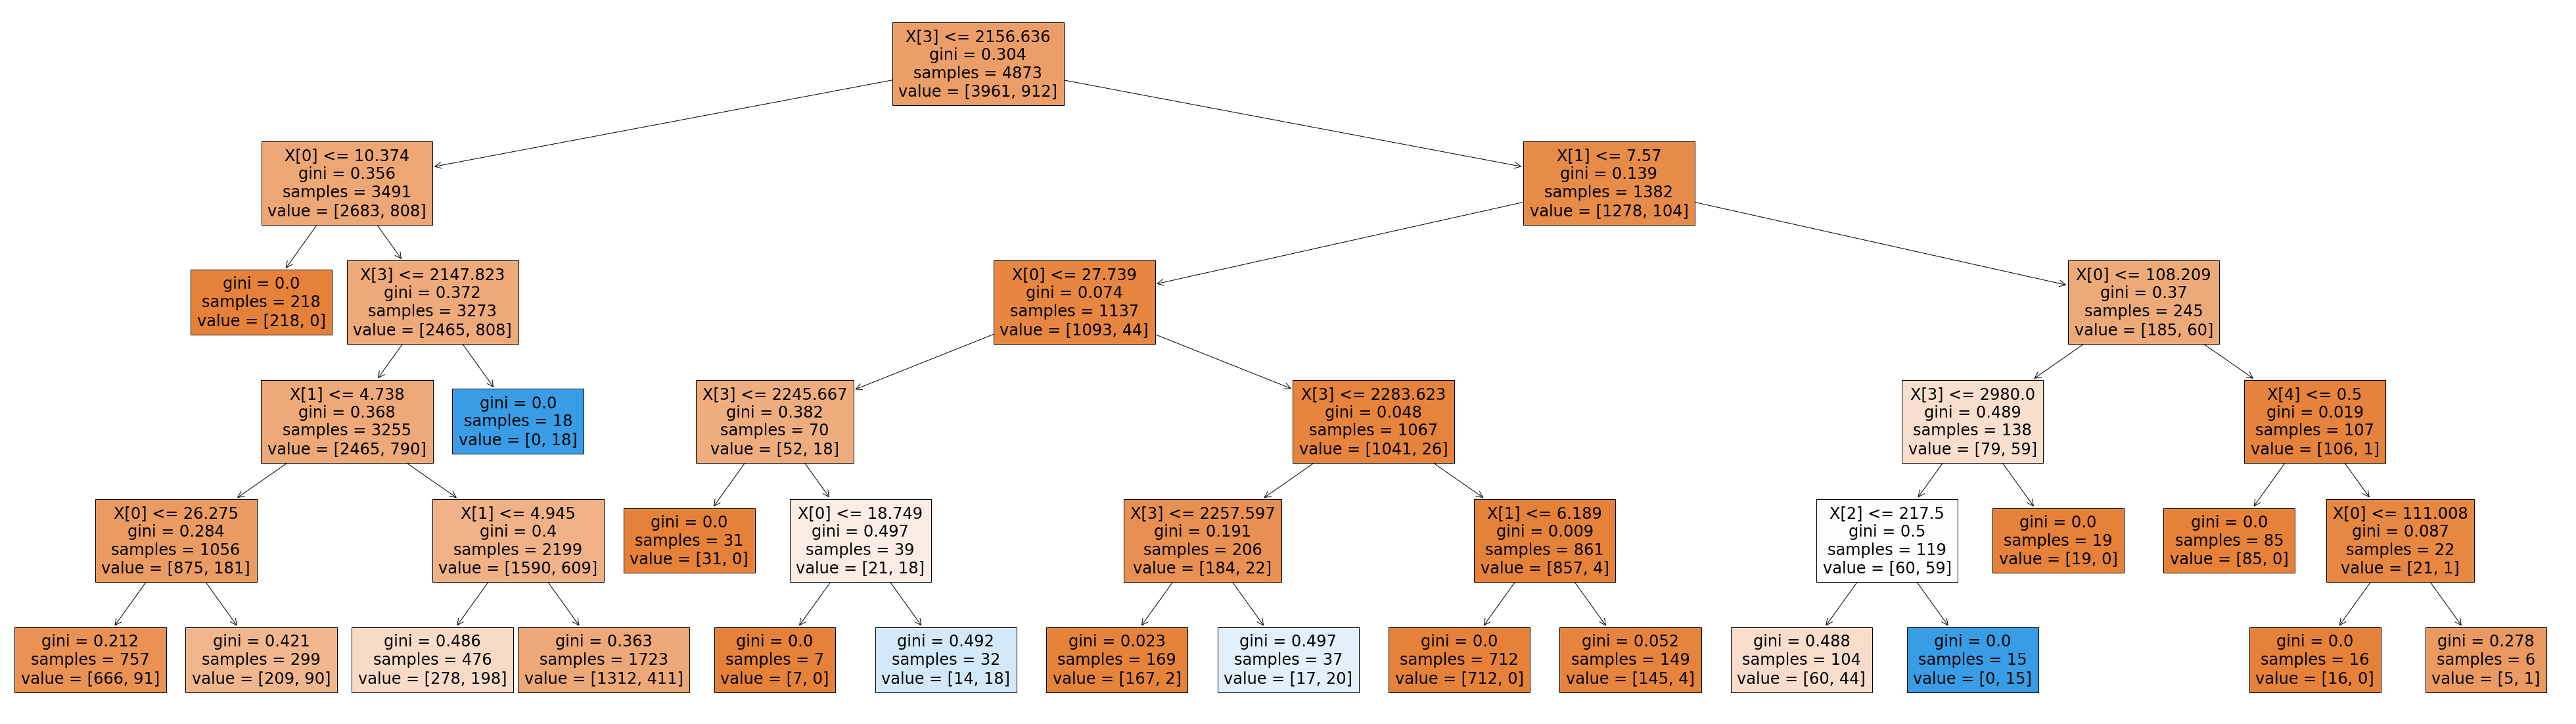

In [35]:
plt.figure(figsize=(70,20))
tree.plot_tree(model2, filled=True)
plt.show()

In [36]:
model3 = DecisionTreeClassifier(criterion='entropy')
model3 = model3.fit(x_train,y_train)
print("Training data accuracy: ", model3.score(x_train, y_train))
print("Test data accuracy: ", model3.score(x_test,y_test))
print("depth of tree: ",model3.get_depth())

Training data accuracy:  0.9195567412271701
Test data accuracy:  0.8958162428219852
depth of tree:  23


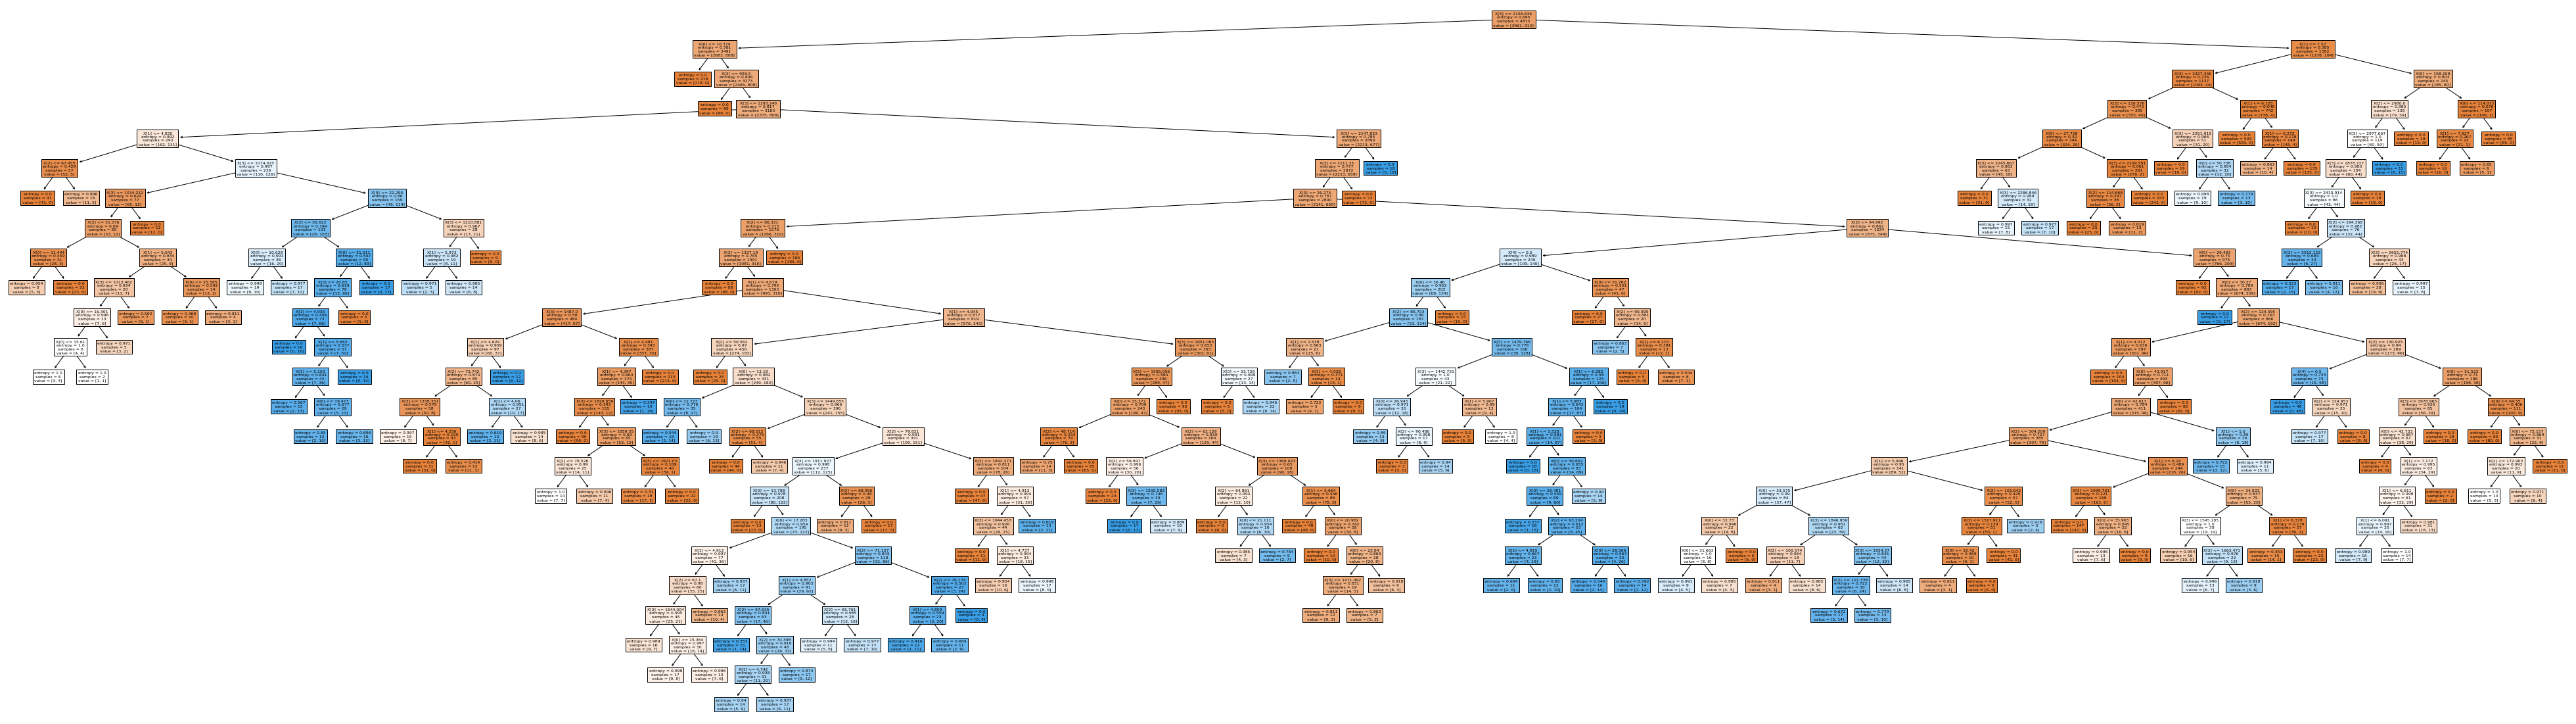

In [37]:
plt.figure(figsize=(70,20))
tree.plot_tree(model3, filled=True)
plt.show()